# Task 3

# Imports

In [4]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import boto3
import awswrangler as wr
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [35]:
## You could download it from your bucket, or you can use the file that I have in my bucket. 
## You should be able to access it from my bucket using your key and secret
## using boto3 via awswrangler since I could not connect to s3 with pandas
df = wr.s3.read_csv(path="s3://mds-s3-student96/ml_data_SYD.csv", boto3_session= session,
                    index_col=0, parse_dates=True)

In [36]:
df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,35.579336,4.268112e+00,1.107466e-03,11.410537,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520,1.190141e+00,1.015323e-04,4.014984,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467,1.003845e-09,1.760345e-05,9.660565,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624,8.225225e-02,1.808932e-01,3.951528,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686,2.496841e+00,4.708019e-09,2.766362,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628


In [37]:
df = df.dropna()

In [38]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

In [43]:
# EDA
observed = train_df['Observed']
observed = observed.resample('Y').mean()

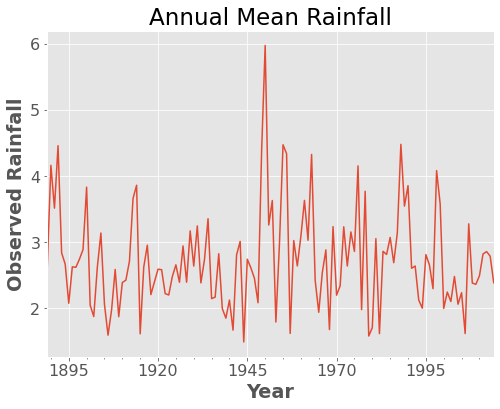

In [45]:
# Plot Annual Mean Rainfall 
observed.plot.line(xlabel="Year", ylabel="Observed Rainfall", legend=False)
plt.title('Annual Mean Rainfall')
plt.show()

In [47]:
# Examine Descriptive Statistics
train_df.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04,36791.000000
mean,2.429419,2.938955,3.716329e+00,2.203086e+00,2.748441e+00,3.092784,3.575203e+00,3.489756e+00,2.879339,2.565430e+00,...,3.213535e+00,1.299377e+00,2.041242e+00,1.533212e+00,1.726792e+00,2.458268,2.890478,3.383557e+00,3.417809e+00,2.726320
std,6.791374,7.048794,7.280859e+00,6.518224e+00,5.997439e+00,6.459254,7.353451e+00,7.039201e+00,6.898890,5.732742e+00,...,6.979341e+00,4.890737e+00,5.347782e+00,5.000287e+00,4.872754e+00,5.815333,7.129072,7.927354e+00,7.558577e+00,8.078310
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.435053e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.054108,0.021248,2.961787e-02,5.089918e-04,2.381995e-03,0.138315,8.899328e-02,9.271159e-02,0.022493,1.201630e-02,...,1.169275e-04,1.270013e-13,1.358104e-13,5.380599e-05,1.866808e-13,0.005478,0.010013,3.651962e-02,4.934874e-02,0.008084
50%,0.192980,0.492758,5.923147e-01,9.644146e-02,2.986511e-01,0.633548,8.278889e-01,8.486242e-01,0.337613,4.296779e-01,...,2.081838e-01,1.579151e-03,1.140358e-01,3.185565e-02,4.989652e-02,0.169617,0.255937,6.539921e-01,6.675421e-01,0.163215
75%,1.445456,2.398539,3.601697e+00,1.318940e+00,2.477893e+00,3.182630,3.727703e+00,3.629963e+00,2.558854,2.295852e+00,...,2.699071e+00,3.465456e-01,1.192421e+00,6.732646e-01,7.874740e-01,1.822582,2.450690,3.275132e+00,3.234430e+00,1.612815
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,9.642382e+01,...,9.306766e+01,1.095008e+02,7.484368e+01,1.016900e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,192.933030


In [50]:
# Training Ensemble Method
ensemble = RandomForestRegressor()
X_train = train_df.drop('Observed', axis = 1)
y_train = train_df['Observed']
ensemble.fit(X_train, y_train)


RandomForestRegressor()

In [52]:
# Evaluating Results
X_test = test_df.drop('Observed', axis = 1)
y_test = test_df['Observed']
test_predict = ensemble.predict(X_test)

In [54]:
# Check RMSE of test_predict
mean_squared_error(y_test, test_predict, squared=False)

8.84250336452479

In [57]:
# Calculate RMSE of individual model in the test set
models = X_test.columns
scores = []
for m in models:
    score = mean_squared_error(y_test, X_test[m], squared=False)
    scores.append(score)
    

In [61]:
test_results = pd.DataFrame({'Models':models, 'RMSE':scores})
test_results

,Models,RMSE
0,ACCESS-CM2,11.038999
1,ACCESS-ESM1-5,10.695305
2,AWI-ESM-1-1-LR,10.996616
3,BCC-CSM2-MR,10.761381
4,BCC-ESM1,10.615578
5,CMCC-CM2-HR4,10.643204
6,CMCC-CM2-SR5,11.480614
7,CMCC-ESM2,11.246493
8,CanESM5,11.151318
9,EC-Earth3-Veg-LR,10.453606


Given that the Test RMSE of ensemble method is lower than all of the individual model's test set RMSE, we can conclude that we are getting better results with ensemble method.

## Part 2:

### Preparation for deploying model next week

#### Complete task 4 from the milestone3 before coming here

We’ve found ```n_estimators=100, max_depth=5``` to be the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [62]:
model = RandomForestRegressor(n_estimators=100, max_depth=20)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

In [63]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 5.50
 Test RMSE: 8.74


In [64]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3. You choose how you want to upload it.***